## <font color=darkblue> Introduction to Long-short term memory (LSTM) Networks</font>


In this notebook, we provide an **overview of LSTMnetworks** and some insights on how to tune deep learning architectures calibration

### <font color=darkred> Bibliography & additional ressources </font>

-  [1] Probabilistic machine learning: an introduction, Kevin P. Murphy, 2022, https://probml.github.io/pml-book/book1.html
``Full book online with all basics on machine learning. Not state-of-the-art but very good introduction``
- [2] Deep learning course, Ms. Sc. Institut Polytechnique de Paris, https://github.com/m2dsupsdlclass/lectures-labs
- [3] Long short-term memory, Hochreiter S. and Schmidhuber J., 1993,   http://www.bioinf.jku.at/publications/older/2604.pdf
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

## <font color=darkred> Introduction</font>

When applying machine learning to sequences, we use an input to predict an output sequence $y_{0:T}$. Designing **generative models based on hidden states** with their own dynamics allows to propose rich statistical models for the output sequence.


There are numerous statistical models to describe $y_{0:T}$.
- Statistical models for time series such as autoregressive models: **Autoregressive Moving Average** (ARMA) models, **Autoregressive Integrated Moving Average** (ARIMA) models...

- Models with latent data to propose more complex generative mechanisms depending on unobserved sequences: mixture models, **Hidden Markov Models** (HMM).
- Models based on deep architecures: **Recurrent Neural networks** (RNN)...




## <font color=darkred> Part *I* : Reminder on RNN and LSTM </font>

### Rationale of RNN

We want to build a neural network specifically designed to process an input sequence $x_{1:T} = (x_1, ..., x_T)$ to predict an output sequence. Recurrent neural networks (RNNs) are designed to model dependencies for sequences of arbitrary length.

Consider a **supervised learning** task which aims to predict  $y_{1:T} = (y_1, ..., y_T )$ using the input $x_{1:T}$. A simple RNN layer writes, for $1\leq t \leq T$,
\begin{align*}
h_t &= \phi_h(W_hh_{t−1} + W_xx_t + b_h)\,,\\
y_t &= \phi_y(W_yh_t + b_y)\,.
\end{align*}
In this case, the latent states are the $(h_t)_{t\geq 0}$.

The unknown parameters are $\theta = \{W_h, W_x, W_y, b_h, b_y\}$, and $\phi_h$ and $\phi_y$ are the
 activation functions.

 Usually, the model is initialized with $h_0 = 0$.

In a regression framework, given sequences of inputs $x^i_{0:T}$ and outputs $y^{*,i}_{0:T}$, training a RNN usually  boils down to solving
$$\mathrm{argmin}_{\theta \in \mathbb{R}^d} \,\left\{\ell_n(\theta)=\frac{1}{nT} \sum_{i=1}^n \sum_{t=1}^T \|y^i_t-y_t^{*,i}\|_2^2 + \lambda \|\theta\|_2^2\right\}\,,
$$
 with $\lambda>0$ and $y^i_t$ is the prediction produced at time $t$ by the RNN.

A graphical model of a RNN.
![](https://www.researchgate.net/profile/Yassin-Khalifa-3/publication/346853926/figure/fig2/AS:1007113883119616@1617126069530/A-simple-RNN-with-a-single-hidden-layer-At-each-time-step-output-is-produced-through_W640.jpg)

![](https://raw.githubusercontent.com/kmkarakaya/Deep-Learning-Tutorials/master/images/LSTM_internal2.png)

RNNs use:

- distributed hidden state that allow **to store  information
about the past efficiently**;

- non-linear dynamics to update hidden states.

**Recurrent neural networks are
deterministic**.

### Rationale of LSTM

In practice, even with the few tricks discussed before, RNN cannot model long-term dependencies. Introduced in [4], LSTM aims at overcoming the issues of RNN.

LSTMs also have a chain-like structure, composed of four interacting sublayers.


Writing $z_t = (h_{t-1},x_t)$, the LSTM cell writes:
\begin{align*}
f_t &= \sigma(W_f z_t + b_f)\,, \quad \mathrm{ forget\; gate}\,,\\
i_t &= \sigma(W_i z_t + b_i)\,, \quad \mathrm{ input\; gate}\,,\\
\tilde c_t &= \mathrm{tanh}(W_c z_t + b_c)\,\\
c_t &= f_t c_{t-1}+ i_t \tilde c_t\,,\\
o_t &= \sigma(W_o z_t + b_o)\,, \quad \mathrm{ output\; gate}\,,\\
h_t &= o_t\mathrm{tanh}( c_t)\,.
\end{align*}

The model is more complex than a simple RNN but the several gates allow to decide **what information is kept or removed in the cell state**. This will be detailed in a session dedicated to LSTM.

A graphical model of a LSTM.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Peephole_Long_Short-Term_Memory.svg/1280px-Peephole_Long_Short-Term_Memory.svg.png)


**GRU variant**
Many variants have been proposed (and no real theoretical results to foster one variant). The Gated Recurrent Unit, or GRU, introduced by [6] is very popular. It **combines the forget and input gates into a single update gate** and **merges the cell state and hidden state**.

Writing $u_t = (h_{t-1},x_t)$, the **GRU cell** writes:
\begin{align*}
z_t &= \sigma(W_s u_t + b_s)\,,\\
r_t &= \sigma(W_r u_t + b_r)\,, \\
\tilde h_t &= \mathrm{tanh}(W_h (r_t h_{t-1},x_t)^\top)\,\\
h_t &= (1-z_t)h_{t-1} + z_t \tilde h_t\,.
\end{align*}

### Basic training of RNN and LSTM

### A very simple example : learning to distinguish between two different frequencies of generated sinusoids

In this very simple example, we generate two time series corresponding to two slightly noised sinus functions with two different frequencies, ```freq_0``` and ```freq_1``` and we want to learn these two frequencies using recurrent neural networks

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
TS_LEN = 100
freq_0 = 0.1
freq_1 = 0.5
freq_noise = 0.1

# Generate the training data
X_train = np.array([[np.sin(i * freq_0) + np.random.normal(0, freq_noise) for i in range(TS_LEN)] for _ in range(TS_LEN)] + [[np.sin(i * freq_1) + np.random.normal(0, freq_noise) for i in range(TS_LEN)] for _ in range(TS_LEN)])
y_train = np.array([0 for _ in range(TS_LEN)] + [1 for _ in range(TS_LEN)])

X_test= np.array([[np.sin(i * freq_0) + np.random.normal(0, freq_noise) for i in range(TS_LEN)] for _ in range(TS_LEN)] + [[np.sin(i * freq_1) + np.random.normal(0, freq_noise) for i in range(TS_LEN)] for _ in range(TS_LEN)])
y_test = np.array([0 for _ in range(TS_LEN)] + [1 for _ in range(TS_LEN)])


In [ ]:
# Create the LSTM model
OUTPUT_LSTM_DIM = 1

### TODO: create a neural network architecture with a LSTM layer
### having the proper input shape and output shape and add a final layer
### that will allow us to perform the classification task
############################################

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 12        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100)

# Print weights
print(model.get_weights())

Epoch 1/100
7/7 [==============================] - 11s 15ms/step - loss: 0.7086 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7073 - accuracy: 0.4950
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7060 - accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7049 - accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7038 - accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7028 - accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7020 - accuracy: 0.5000
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 11/100
7/7 [======

In [ ]:
# Evaluate the model
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', accuracy)

Test loss: 0.4461815655231476
Test accuracy: 1.0


In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split

In [ ]:
# Download dataset
!wget https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/heating_lilles.csv
df = pd.read_csv('heating_lilles.csv')
df.index = pd.DatetimeIndex(df.datetime) + pd.DateOffset(years=-1)
# Add occupation as prior knowledge of the building
df["occupation"] = df.index.map(lambda date: date.hour > 6 and date.hour < 20 and date.weekday() < 5).astype(int)
# Select heating period
df = df[(df.index < datetime.datetime(2019, 4, 18)) | (df.index >= datetime.datetime(2019, 10, 3))]
# Display the dataframe
df.sample(5)

--2023-09-15 12:16:40--  https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/heating_lilles.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1406331 (1.3M) [text/plain]
Saving to: ‘heating_lilles.csv’

heating_lilles.csv  100%[===================>]   1.34M  2.82MB/s    in 0.5s    

2023-09-15 12:16:41 (2.82 MB/s) - ‘heating_lilles.csv’ saved [1406331/1406331]



,datetime,outdoor_temperature_deg_celsius,relative_humidity_per_cent,wind_speed_m_per_s,diffuse_horizontal_radiation_Wh_per_m2,direct_normal_radiation_Wh_per_m2,ZONE+00_+00_+00:Zone Operative Temperature [C](Hourly),heating_J,cooling_J,heating_kWh,cooling_kWh,internal_gains_kWh,infiltration_energy_kWh,ventilation_energy_kWh,inside_conduction_energy_kWh,windows_energy_constant_temperature_kWh,occupation
datetime,,,,,,,,,,,,,,,,,
2019-04-09 04:00:00,2020-04-09 04:00:00,8.25,97.0,1.24,0.00,0.00,16.235728,0.000000e+00,0.0,0.000000,0.0,0.0,-1.573326,0.000000,3.106447,-1.533121,0
2019-01-06 14:00:00,2020-01-06 14:00:00,6.32,84.0,1.66,32.55,14.08,14.999465,3.156632e+07,0.0,8.768421,0.0,0.0,-1.871185,-0.312896,-5.928063,-0.656276,0
2019-10-16 03:00:00,2020-10-16 03:00:00,10.83,90.0,4.00,0.00,0.00,17.746544,0.000000e+00,0.0,0.000000,0.0,0.0,-1.343005,0.000000,2.608464,-1.265459,0
2019-12-18 06:00:00,2020-12-18 06:00:00,5.98,96.0,3.24,0.00,0.00,14.999672,2.115451e+06,0.0,0.587625,0.0,0.0,-1.841309,-0.831596,2.961423,-0.876143,0
2019-11-20 09:00:00,2020-11-20 09:00:00,1.01,89.0,2.00,60.10,623.00,19.012008,2.055383e+08,0.0,57.093983,0.0,0.0,-4.369635,-25.237161,-31.200030,3.712843,1


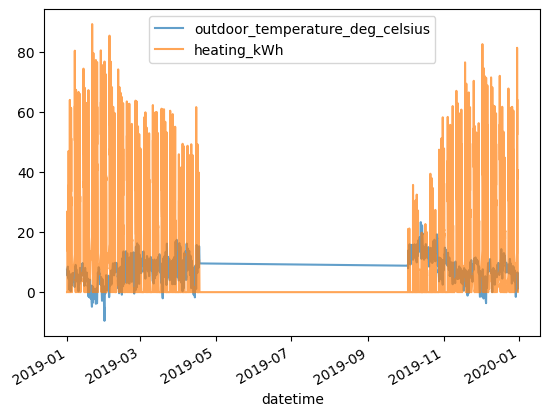

In [ ]:
df.plot(y=["outdoor_temperature_deg_celsius", "heating_kWh"], alpha=0.7);

In [ ]:
# Extract a dataset with a fixed sample size
SAMPLE_SIZE = 24*7*2
# Select inputs and outputs
X = df[["outdoor_temperature_deg_celsius", "occupation"]].values.reshape(-1, SAMPLE_SIZE, 2)
y = df[["heating_kWh"]].values.reshape(-1, SAMPLE_SIZE, 1)
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Normalize
X_max = X_train.reshape(-1, 2).max(0)
y_max = y_train.max()
X_train = X_train / X_max - 0.5
y_train = y_train / y_max - 0.5
X_test = X_test / X_max - 0.5
y_test = y_test / y_max - 0.5
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11, 336, 2), (3, 336, 2), (11, 336, 1), (3, 336, 1))

**RNN**

Keras Layers can be found here: ``https://keras.io/api/layers/``

In [ ]:
model_rnn = tf.keras.Sequential([
    tf.keras.Input(shape=(SAMPLE_SIZE, 2)),
    tf.keras.layers.SimpleRNN(16, return_sequences=True),
    tf.keras.layers.Dense(1),
])
model_rnn.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),
)
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 336, 16)           304       
                                                                 
 dense_1 (Dense)             (None, 336, 1)            17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model_rnn.fit(
    x=X_train,
    y=y_train,
    epochs=1000,
    batch_size=16,
    verbose=0,
    validation_data=(X_test, y_test),
    shuffle=True
)
model_rnn.evaluate(x=X_test, y=y_test, batch_size=16);

1/1 [==============================] - 0s 49ms/step - loss: 9.7904e-04


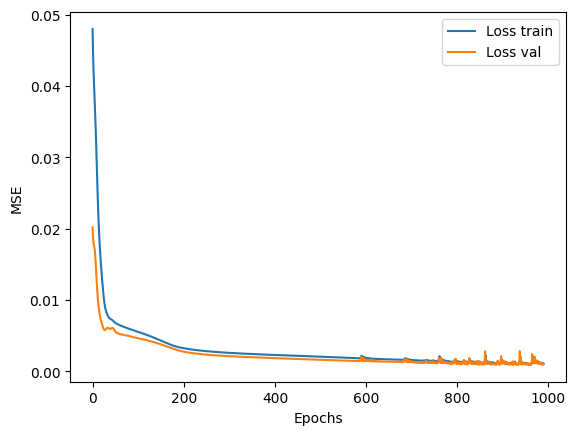

In [ ]:
# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history.history["loss"][10:], label="Loss train")
plt.plot(history.history["val_loss"][10:], label="Loss val")
plt.legend();

**LSTM**

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.Input(shape=(SAMPLE_SIZE, 2)),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Dense(1),
])
model_lstm.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),
)
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 336, 16)           1216      
                                                                 
 dense_2 (Dense)             (None, 336, 1)            17        
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1233 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model_lstm.fit(
    x=X_train,
    y=y_train,
    epochs=1000,
    batch_size=16,
    verbose=0,
    validation_data=(X_test, y_test),
    shuffle=True
)
model_lstm.evaluate(x=X_test, y=y_test, batch_size=16);

1/1 [==============================] - 0s 30ms/step - loss: 0.0011


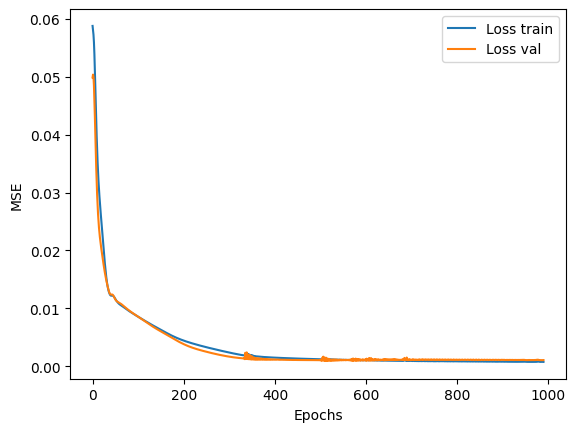

In [ ]:
# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history.history["loss"][10:], label="Loss train")
plt.plot(history.history["val_loss"][10:], label="Loss val")
plt.legend();

### Gradient propagation in LSTM

As explained during the sessions on RNN and FFNN, **gradient propagation can also be computed recursively for LSTM**. The computations are slightly more involved for LSTM but use the same elementary steps i.e. chain rule.

Of course, understanding these computations is not crucial to train and run experiments for LSTM. It is **still important** in case we aim at **modifying the architecture for specific applications**.

A short paper with all details: ``Fundamentals of Recurrent Neural Network (RNN) and Long Short-Term Memory (LSTM) Network https://arxiv.org/pdf/1808.03314.pdf``

### Links between LSTM and attention models

Following https://arxiv.org/pdf/1805.03716.pdf, we can consider a simplifier LSTM network. The prediction of a new data is performed by updating $(c_t,h_t)_{t\geq 0}$, using $\sigma$ as a generic activation function:
\begin{align*}
\tilde c_t &= \sigma (W_1 h_{t-1} + W_2 X_{t})\,,\\
i_t &= \sigma (W_3 h_{t-1} + W_4 X_{t})\,,\\
f_t &= \sigma (W_5 h_{t-1} + W_6 X_{t})\,,\\
c_t &= i_t \tilde c_t + f_t c_{t-1}\,,\\
o_t &= \sigma (W_7 h_{t-1} + W_8 X_{t})\,,\\
h_t &= o_t\sigma(c_t)\,,\\
\end{align*}

In this setting we can derive a recursive formulation of $c_t$:
$$
c_t = \sum_{j=0}^t i_j \left(\prod_{k=j+1}^t f_k\right)\tilde c_j\,.
$$
The expression is obtained by induction. If this is true at time $t$, write at $t+1$,
\begin{align*}
c_{t+1} = i_{t+1} \tilde c_{t+1} + f_{t+1} c_{t} &= i_{t+1} \tilde c_{t+1} + f_{t+1} \sum_{j=0}^t i_j \left(\prod_{k=j+1}^t f_k\right)\tilde c_j\,,\\
&= \sum_{j=0}^{t+1} i_j \left(\prod_{k=j+1}^{t+1} f_k\right)\tilde c_j\,.
\end{align*}


We note that $c_{t+1}$ can be written
$$
c_{t+1} = \sum_{j=0}^{t+1}\omega_j^{t+1}\tilde c_j\,.
$$

In an **oversimplified model** model where
\begin{align*}
\tilde c_t &= \sigma (W_2 X_{t})\,,\\
i_t &= \sigma (W_4 X_{t})\,,\\
f_t &= \sigma (W_6 X_{t})\,,
\end{align*}
we obtain
$$
c_t = \sum_{j=0}^t \sigma (W_2 X_{j})\left(\prod_{k=j+1}^t \sigma (W_6 X_{k})\right)\sigma (W_2 X_{j})\,.
$$
It is therefore an **element-wise weighted sum of featurized inputs**.

Contrary to attention models (and to Transformers) the weights are constrained and the fact that $\|f_k\|\leq 1$ leads to **exponentially decaying weights**.

## <font color=darkred> Part II: End-to-end training of deep architectures - Normalization & Cross validation</font>

### Data normalization

Data normalization is a crucial preprocessing step for most data mining and Machine Learning approaches. It is of the utmost importance to ensure stable training of deep architectures for instance.

Standard preprocessing techniques include **min-max scaler** and **standardization** of data.

- **Min-max scaler**: rescaling data from the original range so that all values are within the range of 0 and 1. Only requires to compute the minimum and maximum values over the training set.

- **Standardization**:  rescaling the distribution of the training data so that the mean of observed values is 0 and the standard deviation is 1. Only requires to compute the empirical mean end standard deviation over the training set.

Time series usually contain trends and seasonality. Dealing with these before training a model usually improves performance greatly. In such settings can lead to **varying mean over time** or **changing variance over time**. Such nonstationary properties lead to model more difficult to train.

An elementary way to understand the time series is to use the  Seasonal decomposition using moving averages: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


``statsmodels.tsa.seasonal.seasonal_decompose`` outputs an object with seasonal, trend, and resid attributes.


### Rationale of Cross validation

 Most of statistical learning algorithms depends on parameters $\lambda$.


- Number of input variables in linear and logistic models.
- Penalty parameters for lasso and ridge regressions.
- Depth for tree algorithms.
- Number of layers and neurons of deep learning architectures.

**$\lambda$ often measures model complexity**.

**Bias**: difference between the expected value of the estimator (model) and the true value being estimated.

- A simpler model has a higher bias (naturally a simple model will do some errors)!
- High bias can cause **underfitting!**

**Variance**: deviation from the expected value of the estimates!
- A more complex model has a higher variance!
- High variance can cause **overfitting!**

Ideally we want to optimize both of them.


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZZhx-iO6cjFBg8qreLuINg.png)

High bias $\Longrightarrow$ high training and test errors.

High variance $\Longrightarrow$ low training error, high test errors.

 A trained network has to be generalizable: it must be able to work on other data than the training dataset.

This can be achieved using **cross-validation**.

The empirical error on the training set is a poor estimate of the generalization error (expected error on new data)!

We want to estimate the generalization error on new data (i.e. not in the training set).

See additional details here: https://scikit-learn.org/stable/modules/cross_validation.html

**Cross-validation provides the best model (for the chosen metric) by training and testing the model on different portions of the data**.

This idea is to carry out the train-test split several times by varying the data in the training set and in the test set.

**Validation Hold out**

 The simplest approach consists in splitting the data into:
- a learning or training set $D_{n,train}$ used to learn the algorithm $f_n$,
- a validation or test set $D_{n,test}$ used to estimate the risk of $f_n$.




**K-fold cross validation**


- Define a random partition $\{I_1,\ldots , I_K\}$  of $\{1,\ldots , n\}$;

- For a fixed $\lambda$, for $k=1,\ldots, K$

 -  $I_{train} = \{1,\ldots , n \} \setminus I_k \, \, $ and $\, \, I_{test} = I_k$ ;
 - Learn the malgorithm with $D_{n,train} = \{ (X_i,Y_i), i \in I_{train}\} \Longrightarrow f_{n,k}^{(\lambda)}$;

 - Compute the test error $\mathrm{Err}_{test} ( f_{n,k}^{(\lambda)} ) = \frac{1}{ n- | I_k |} \sum_{i \in  I_k} \ell \left( Y_i , f_{n,k}^{(\lambda)}( X_i ) \right)$.

- Choose
$$\hat{\lambda}^{(CV)} \in \mathrm{argmin}_{\lambda \in \Lambda} \frac{1}{K} \sum_{k=1}^K \mathrm{Err}_{test} ( f_{n,k}^{(\lambda)} ).
$$


![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

### Cross validation for independent data

We first use a simple dataset based on i.i.d. data before considering the specific problems related to time series.

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

In [ ]:
y = tf.keras.utils.to_categorical(Y, 3)

In [ ]:
# Model 1: one hidden layer and one output layer
model1 = Sequential()
model1.add(Dense(3, input_dim=4, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model 2: two hidden layers and one output layer
####
# Implement here your proposed model to beat model1
####

**Example with K-fold from scratch**

Detailed comments on cross validation and on efficient protocols to evaluate training procedures: https://scikit-learn.org/stable/modules/cross_validation.html#

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy1 = []
accuracy2 = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model1.fit(X_train, y_train, epochs=10, verbose=0)
    model2.fit(X_train, y_train, epochs=10, verbose=0)

    y_pred1 = model1.predict(X_test)
    y_pred1 = tf.argmax(y_pred1, axis=1)

    y_pred2 = model2.predict(X_test)
    y_pred2 = tf.argmax(y_pred2, axis=1)

    y_test = tf.argmax(y_test, axis=1)

    accuracy1 = np.append(accuracy1,accuracy_score(y_test, y_pred1))
    accuracy2 = np.append(accuracy1,accuracy_score(y_test, y_pred2))
    #print(f'Accuracy: {accuracy}')


1/1 [==============================] - 0s 21ms/step


In [ ]:
print("Scores mean and std of model 1: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy1), np.std(accuracy1)))
print("Scores mean and std of model 2: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy2), np.std(accuracy2)))

Scores mean and std of model 1: 0.66% (+/- 0.06%)
Scores mean and std of model 2: 0.69% (+/- 0.08%)


### Cross validation for time series

In the case of time series (or dependent data), random split can lear to poor performance as it does not take into account the time index. There are several data splitting techniques that can be used for time series: see for instance https://pypi.org/project/timeseries-cv/

**Expanding window or forward chaining**

The most common split for time series is given by ``TimeSeriesSplit`` which is detailed here:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

It can be understood as an adapation of K-Fold cross validation for time series  where in the $k$-th split, the first k folds are used to train the model and the $k+1$-th fold is the test set.



![](https://cdn-images-1.medium.com/fit/c/602/276/1*qvdnPF8ETV9mFdMT0Y_BBA.png)

**Sliding window**

 In this case instead of using just a training set of incresing size, each split is obtained by **using a sliding window across time**.

 If the time series contains enough data, the sliding window **splits data into consecutive blocks** which are split into two datasets, one for training anf one to compute the test score.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*eDhIeekv2HkUHTiWUZ_dcg.png)

## <font color=darkred> Part III : time series prediction with LSTM and cross validation</font>

### Detailed train/val split

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Input
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Context and forecast heuristics

In the previous example, we used Recurrent Neural networks for a regression task : at a given time step, we inferred one column of the dataframe (``"heating_kWh"``), using two other columns of the dataframe. (``"outdoor_temperature_deg_celsius"`` and ``"occupation"``). In this task, we will focus on building a model, that will predict the future values of the indoor temperature ``"ZONE+00_+00_+00:Zone Operative Temperature [C](Hourly)"``, given a history of 4 inputs : ```['ZONE+00_+00_+00:Zone Operative Temperature [C](Hourly)',\
    "heating_kWh", "outdoor_temperature_deg_celsius", "occupation"]```

In [ ]:
# Download dataset
!wget https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/heating_lilles.csv
df = pd.read_csv('heating_lilles.csv')
df.index = pd.DatetimeIndex(df.datetime) + pd.DateOffset(years=-1)
# Add occupation as prior knowledge of the building
df["occupation"] = df.index.map(lambda date: date.hour > 6 and date.hour < 20 \
                                and date.weekday() < 5).astype(int)
# Select heating period
df = df[(df.index < datetime.datetime(2019, 4, 18)) | \
 (df.index >= datetime.datetime(2019, 10, 3))]\
  [['ZONE+00_+00_+00:Zone Operative Temperature [C](Hourly)',\
    "heating_kWh", "outdoor_temperature_deg_celsius", "occupation"]]
# Display the dataframe
df.sample(5)

--2023-09-15 13:08:45--  https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/heating_lilles.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1406331 (1.3M) [text/plain]
Saving to: ‘heating_lilles.csv.1’

heating_lilles.csv. 100%[===================>]   1.34M  --.-KB/s    in 0.04s   

2023-09-15 13:08:45 (30.4 MB/s) - ‘heating_lilles.csv.1’ saved [1406331/1406331]



,ZONE+00_+00_+00:Zone Operative Temperature [C](Hourly),heating_kWh,outdoor_temperature_deg_celsius,occupation
datetime,,,,
2019-12-11 18:00:00,19.001328,27.972601,5.54,1
2019-02-21 21:00:00,17.124881,0.000000,6.59,0
2019-11-14 10:00:00,19.007537,28.742166,6.35,1
2019-11-07 18:00:00,19.000328,20.295095,7.72,1
2019-03-17 17:00:00,15.091404,0.000000,7.10,0


The goal here is to forecast the indoor temperature using the following ML heuristics : given a history of temperatures, we want to foresee what these temperatures will be like in the future. Let us define the following variables :
- We will set ``INPUT_SIZE`` to be the size of the input data that will be fed to the neural network.  If ``INPUT_SIZE`` is set to ``48``, we will feed the neural network with the 48 hours of data points to make a prediction.
- We will set the ``SHIFT`` to be the delay between the end of the input and the chosen starting date of the prediction. For instance, if we want to predict what the data will be like in one day from now, we will set the shift to be ``SHIFT = 24``.
- We will set the ``HORIZON`` to be the total length of the prediction that we want to output. For example, if ``HORIZON = 24``, we will predict the data for a total duration of 24 hours

In order to train a neural network, we need to sample our time series in sets of labeled data. A common practice is to use rolling time windows. The idea is the following:
- We consider a rolling starting point, that will correspond to the starting point of the data we are sampling
- We take window of size ```WINDOW_SIZE = INPUT_SIZE + SHIFT + HORIZON```
- We consider the numpy array having this window size, starting from the considered datapoint and we sample build the ```(data, label)```pair corresponding to this window
3-d matrix of size ```(None, INPUT_SIZE, NUM_FEATURES)``` for the input and a 2d matrix of size ```(None, HORIZON)``` for the label.

### Building the datasets used to train the neural networks and applying the functions to a simple example

In order to see how to format the data to create a forecast model, let us start with a simple example, with the following chosen parameters:

In [ ]:
INPUT_SIZE = 4
SHIFT = 3
HORIZON = 2
WINDOW_SIZE = INPUT_SIZE + SHIFT + HORIZON #=9
LABEL_INDEX = 0

And the following simple data consisting of a series of two features that have opposite values:

In [ ]:
DATA_LENGTH = 25 ##length of our time series
data_example = np.array([[i,-i] for i in range(DATA_LENGTH)])
print(data_example)

First let us consider a window of fixed size ```WINDOW_SIZE```. The following function builds the ```(data, label)``` pair corresponding to that window.

In [ ]:
def get_labelled_window(x, input_size, horizon, label_index):
  """
  Splits a window into a data, label pair
  """
  return x[:,:input_size,:], x[:,-horizon:,label_index]

Let us consider one window of our dataset to see how ```get_labeled_window``` works.

In [ ]:
window_example = np.array([[[i,-i] for i in range(WINDOW_SIZE)]])
print(window_example)

In [ ]:
print(get_labelled_window(window_example, INPUT_SIZE, HORIZON, LABEL_INDEX))

Now that we have understood the way we split a given window, let us build the training set by repeating the process over all the windows. We will start again with a 2d array corresponding to the input data. Let us see how the following function ```make_windows``` processes that data.

In [ ]:
def make_windows(data, input_size, shift, horizon, label_index):
  """
  This functions builds the matrices of windows, labels
  """
  window_size = input_size + shift + horizon
  window_step = np.arange(window_size)\
                  .reshape(1, window_size)
  matrix_column_length = len(data)-(window_size-1)
  window_indices = window_step + np.arange(matrix_column_length)\
                                .reshape(1, matrix_column_length).T
  windowed_array = data[window_indices,:]

  windows, labels = get_labelled_window(windowed_array,
                                        input_size = input_size,
                                        horizon=horizon,
                                        label_index = label_index)
  return windows, labels

In [ ]:
make_windows(data_example, INPUT_SIZE, SHIFT, HORIZON, LABEL_INDEX)

Now that we have built the training data in the proper format that will be fed into the neural network, we can split this data between a training and a validation set. Contrarily to tabular data, we can't shuffle the data here. We will take the first part of the time series and use it to train the model and the rest of time series in subsequent time steps will be used to validate the model.

In [ ]:
# Make train/val splits
def make_train_val_splits(data,
                          input_size,
                          shift,
                          horizon,
                          label_index,
                          train_split=0.8):
  """
  Splits matching pairs of windows and labels into train and val splits.
  """
  split_size = int(len(data) * train_split)
  data_train = data[:split_size]
  data_val = data[split_size:]
  train_windows, train_labels = make_windows(data_train,
                                             input_size,
                                             shift,
                                             horizon,
                                             label_index)

  val_windows, val_labels = make_windows(data_val,
                                         input_size,
                                         shift,
                                         horizon,
                                         label_index)

  return train_windows, train_labels, val_windows, val_labels

In [ ]:
train_windows, train_labels, val_windows, val_labels = make_train_val_splits(data_example,
                          INPUT_SIZE,
                          SHIFT,
                          HORIZON,
                          LABEL_INDEX,
                          train_split=0.6)

In [ ]:
print("Inputs of the training set: \n")
print(train_windows)
print("\n Labels of the training set: \n")
print(train_labels)
print("\n Inputs of the validation set: \n")
print(val_windows)
print("\n Labels of the validation set: \n")
print(val_labels)

### Using preexisting Tensorflow functions to build the time series datasets.


We built the time series datasets using simple numpy functions.
Tensorflow offers high levels functions to perform train/test split operations.
The function ```tf.keras.utils.timeseries_dataset_from_array``` that perform these rolling time windows reformating.

See https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array.


In [ ]:
import tensorflow as tf

In [ ]:
array_input = np.array([i for i in range(99)])
array_labels = np.array([10*i for i in range(99)])
dataset = tf.keras.utils.timeseries_dataset_from_array(array_input, \
                                                       targets = array_labels,\
                                                       sequence_length=10,\
                                                       sampling_rate=2, \
                                                       sequence_stride=3,\
                                                       shuffle=False,\
                                                       batch_size=4)

In [ ]:
count = 0
for data, label in dataset:
    print(f"Batch number: {count}")
    print("Data")
    print(data)
    print("Label")
    print(label)
    count += 1
    print("\n")

 Using this tensorflow function, let us now rewrite the ```make_windows``` function.

In [ ]:
def make_windows_tensorflow(data, input_size, shift, horizon, label_index):
  inputs_data = data[:-input_size]
  targets_data = data[input_size+shift:, label_index]
  targets_batched = tf.keras.utils.timeseries_dataset_from_array(\
                                       targets_data, \
                                       targets = None, sequence_length=horizon)
  inputs_batched = tf.keras.utils.timeseries_dataset_from_array(
      inputs_data, targets = None, sequence_length=input_size)
  data_batched = tf.data.Dataset.zip((inputs_batched, targets_batched))
  for inputs, targets in data_batched.take(1):
    length_data = max(inputs.shape[0], targets.shape[0])
    return inputs[:length_data].numpy(), targets[:length_data].numpy()

In [ ]:
make_windows_tensorflow(data_example, INPUT_SIZE, SHIFT, HORIZON, LABEL_INDEX)

It must be said here that this function ```make_windows_tensorflow``` is not optimal when it comes to splitting the data in a Tensorflow framework as at the end we convert Tensorflow objects to numpy arrays, which slows the processes.
To know more about ways to build a Tensorflow-compatible pipeline for time series prediction, it is recommended to read the following tutorial, which is quite exhaustive:

https://www.tensorflow.org/tutorials/structured_data/time_series


### Applying the functions to our dataset

Now that we know how to build our dataset in the context of the forecasting task, let us apply this pipeline to our dataset ```df```

In [ ]:
INPUT_SIZE = 72
SHIFT = 0
HORIZON = 24
LABEL_INDEX = 0
NUM_FEATURES = 4

In [ ]:
time_series = df.values

In [ ]:
train_windows, train_labels, val_windows, val_labels = make_train_val_splits(
    time_series,
    INPUT_SIZE,
    SHIFT,
    HORIZON,
    LABEL_INDEX
    )

In [ ]:
train_max = train_windows.reshape(-1, NUM_FEATURES).max(0)
label_max = train_labels.max()
train_windows = train_windows / train_max - 0.5
train_labels = train_labels / label_max - 0.5
val_windows = val_windows / train_max - 0.5
val_labels = val_labels / label_max - 0.5

In [ ]:
model_GRU = tf.keras.Sequential([
    tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
    tf.keras.layers.GRU(64, return_sequences = True),
    tf.keras.layers.GRU(16),
    tf.keras.layers.Dense(HORIZON),
])
model_GRU.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),
)
model_GRU.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 72, 64)            13440     
                                                                 
 gru_1 (GRU)                 (None, 16)                3936      
                                                                 
 dense_7 (Dense)             (None, 24)                408       
                                                                 
Total params: 17784 (69.47 KB)
Trainable params: 17784 (69.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_GRU.compile(loss=tf.keras.losses.MeanSquaredError(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3)
                   )
model_GRU.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 72, 64)            13440     
                                                                 
 gru_1 (GRU)                 (None, 16)                3936      
                                                                 
 dense_7 (Dense)             (None, 24)                408       
                                                                 
Total params: 17784 (69.47 KB)
Trainable params: 17784 (69.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit model
history = model_GRU.fit(train_windows,
            train_labels,
            epochs=50,
            verbose=1,
            batch_size=64,
            shuffle=True,
            validation_data=(val_windows, val_labels))

Epoch 1/50
58/58 [==============================] - 6s 27ms/step - loss: 0.0242 - val_loss: 0.0079
Epoch 2/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0054 - val_loss: 0.0066
Epoch 3/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 4/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 5/50
58/58 [==============================] - 1s 10ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 6/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 7/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 8/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 9/50
58/58 [==============================] - 1s 9ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 10/50
58/58 [==============================] - 1s 10ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 11/50
58/5

In [ ]:
offset = 1
labels_pred_window = model_GRU.predict(val_windows)
labels_val_pred = labels_pred_window[:,offset]
labels_val_true = val_labels[:,offset]

27/27 [==============================] - 1s 4ms/step


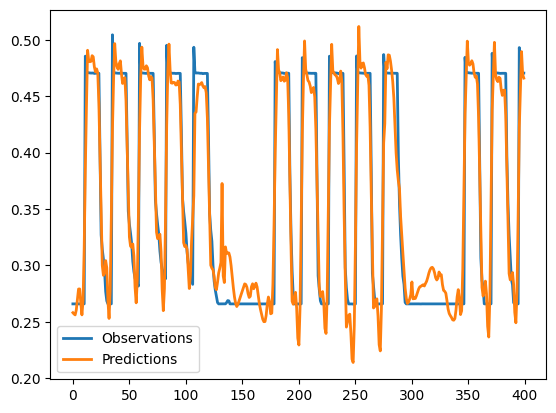

In [ ]:
plt.plot(labels_val_true[0:400], lw=2, label="Observations")
plt.plot(labels_val_pred[0:400], lw=2, label="Predictions")
plt.legend()

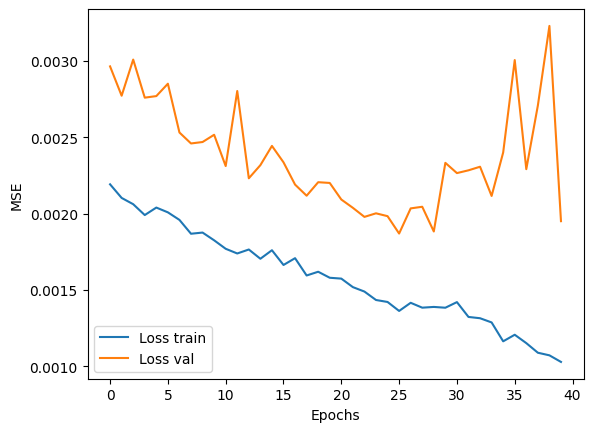

In [ ]:
# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history.history["loss"][10:], label="Loss train")
plt.plot(history.history["val_loss"][10:], label="Loss val")
plt.legend()

### Complete cross validation to select best model (FFNN, RNN, LSTM)


In this section, we will use the forward-chaining cross-validation to perform the same prediction task as above and compare and confront several neural network architectures (FFNN, LSTM, GRU,...).

Note that **we can (should!) also perform cross-validation to choose between different hyperparameters** (the dimensionality of hidden layers, the learning rates, the batch size,...).

Such a cross-validation method is called **grid-search** (full or randomized) but we leave this part for another session. All hyperparameters are fixed and we want to focus on which architecture to choose for our prediction task.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

##Let us recall the data and all important variables.
INPUT_SIZE = 72
SHIFT = 0
HORIZON = 24
LABEL_INDEX = 0
NUM_FEATURES = 4
time_series = df.values

In [ ]:
def FFNN():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(24, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(HORIZON, activation="tanh"),
    ])
    return model

In [ ]:
def CNN():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.Conv1D(32, activation='sigmoid', kernel_size=(8), padding="causal"),
        tf.keras.layers.Conv1D(16, activation='sigmoid', kernel_size=(4), padding="causal"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(HORIZON, activation="tanh")
    ])
    return model


In [ ]:
def RNN():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.SimpleRNN(32),
        tf.keras.layers.Dense(HORIZON, activation = 'tanh'),
    ])
    return model

In [ ]:
def GRU():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.GRU(64, return_sequences = True),
        tf.keras.layers.GRU(16),
        tf.keras.layers.Dense(HORIZON, activation = 'tanh'),
    ])
    return model

In [ ]:
def LSTM():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.LSTM(64, return_sequences = True),
        tf.keras.layers.LSTM(16),
        tf.keras.layers.Dense(HORIZON, activation = 'tanh'),
    ])
    return model

In [ ]:
models_dict = dict()
models_dict["FFN"] = FFNN
models_dict["CNN"] = CNN
models_dict["RNN"] = RNN
models_dict["GRU"] = GRU
models_dict["LSTM"] = LSTM

In [ ]:
def compile_and_fit(model, X_train, y_train, X_val, y_val):
    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),
    )
    # Fit model
    history = model.fit(X_train,
                y_train,
                epochs=75,
                verbose=1,
                batch_size=64,
                shuffle=True,
                validation_data=(X_val, y_val))

    return history

In [ ]:
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
print(tscv)


### The losses_per_model dictionary will eventually be a dictionary which keys
### correspond to the benchmark of models. For each model, the corresponding
### value will be a list of n_split values corresponding to the loss of this
### for each of the fold.
losses_per_model = {x:[] for x in models_dict}

fold_number = 0
for train_index, val_index in tscv.split(time_series):
    print(f"Fold number {fold_number}")
    ### Choose the data corresponding to the current fold
    data_train, data_val = time_series[train_index], time_series[val_index]

    ### Processing the data into data, labels pais and training and validation
    ### before feeding them to the network
    train_windows, train_labels = make_windows_tensorflow(data_train,
                                              INPUT_SIZE,
                                              SHIFT,
                                              HORIZON,
                                              LABEL_INDEX
                                              )

    val_windows, val_labels = make_windows_tensorflow(data_val,
                                              INPUT_SIZE,
                                              SHIFT,
                                              HORIZON,
                                              LABEL_INDEX
                                              )

    #### Normalizing the data
    train_max = train_windows.reshape(-1, NUM_FEATURES).max(0)
    label_max = train_labels.max()
    train_windows = train_windows / train_max - 0.5
    train_labels = train_labels / label_max - 0.5
    val_windows = val_windows / train_max - 0.5
    val_labels = val_labels / label_max - 0.5

    for model_name in models_dict:

      model = models_dict[model_name]()
      history = compile_and_fit(model, train_windows, train_labels, val_windows, val_labels)

      # Generate generalization metrics
      score = model.evaluate(val_windows, val_labels, verbose=0)

      print(f'Score of fold {fold_number} for model {model_name}: val_loss of {score}')

      losses_per_model[model_name].append(score)

    fold_number +=1


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold number 0
Epoch 1/75
2/2 [==============================] - 1s 161ms/step - loss: 0.1699 - val_loss: 0.1550
Epoch 2/75
2/2 [==============================] - 0s 47ms/step - loss: 0.1322 - val_loss: 0.1350
Epoch 3/75
2/2 [==============================] - 0s 33ms/step - loss: 0.1210 - val_loss: 0.1240
Epoch 4/75
2/2 [==============================] - 0s 49ms/step - loss: 0.1154 - val_loss: 0.1168
Epoch 5/75
2/2 [==============================] - 0s 30ms/step - loss: 0.1106 - val_loss: 0.1107
Epoch 6/75
2/2 [==============================] - 0s 36ms/step - loss: 0.1063 - val_loss: 0.1053
Epoch 7/75
2/2 [==============================] - 0s 51ms/step - loss: 0.1022 - val_loss: 0.1004
Epoch 8/75
2/2 [==============================] - 0s 53ms/step - loss: 0.0978 - val_loss: 0.0960
Epoch 9/75
2/2 [==============================] - 0s 33ms/step - loss: 0.0928 - val_loss: 0.0913
Epoch 10/75
2/2 [=======================

In [ ]:
fold_number = 0
for train_index, val_index in tscv.split(time_series):
  for model_name in models_dict:
    score = losses_per_model[model_name][fold_number]
    print(f'Score of fold {fold_number} for model {model_name}: val_loss of {score}')
  fold_number = fold_number + 1

Score of fold 0 for model FFN: val_loss of 0.00827149860560894
Score of fold 0 for model CNN: val_loss of 0.008413130417466164
Score of fold 0 for model RNN: val_loss of 0.005674402229487896
Score of fold 0 for model GRU: val_loss of 0.0058917938731610775
Score of fold 0 for model LSTM: val_loss of 0.0038712546229362488
Score of fold 1 for model FFN: val_loss of 0.00665690703317523
Score of fold 1 for model CNN: val_loss of 0.007205653935670853
Score of fold 1 for model RNN: val_loss of 0.0037877082359045744
Score of fold 1 for model GRU: val_loss of 0.003403659909963608
Score of fold 1 for model LSTM: val_loss of 0.002156835747882724
Score of fold 2 for model FFN: val_loss of 0.005592030473053455
Score of fold 2 for model CNN: val_loss of 0.0052582090720534325
Score of fold 2 for model RNN: val_loss of 0.0017969475593417883
Score of fold 2 for model GRU: val_loss of 0.0017485739663243294
Score of fold 2 for model LSTM: val_loss of 0.002391606802120805
Score of fold 3 for model FFN: va

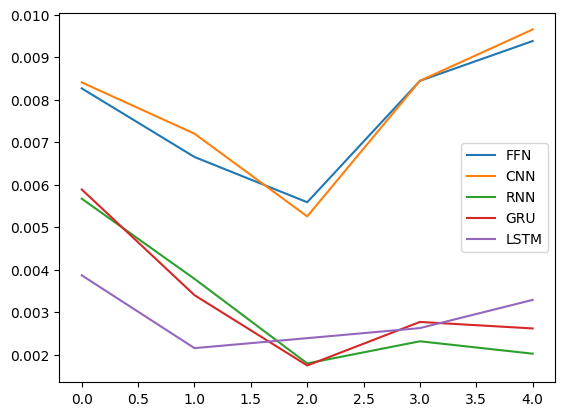

In [ ]:
for model_name in losses_per_model:
    plt.plot(losses_per_model[model_name])

plt.legend(list(losses_per_model.keys()))

# function to show the plot
plt.show()

### Autre tentative

In [ ]:
def FFNN():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(24, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(HORIZON, activation="tanh"),
    ])
    return model

In [ ]:
def CNN():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(INPUT_SIZE, NUM_FEATURES)),
        tf.keras.layers.Conv1D(32, activation='sigmoid', kernel_size=(8), padding="causal"),
        tf.keras.layers.Conv1D(16, activation='sigmoid', kernel_size=(4), padding="causal"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(HORIZON, activation="tanh")
    ])
    return model

In [ ]:
def compile_and_fit(model, X_train, y_train, X_val, y_val):
    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),
    )
    # Fit model
    history = model.fit(X_train,
                y_train,
                epochs=50,
                verbose=1,
                batch_size=64,
                shuffle=True,
                validation_data=(X_val, y_val))

    return history

In [ ]:
models_dict = dict()
models_dict["FFN"] = FFNN
models_dict["CNN"] = CNN
models_dict["RNN"] = RNN
models_dict["GRU"] = GRU
models_dict["LSTM"] = LSTM

In [ ]:
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
print(tscv)


### The losses_per_model dictionary will eventually be a dictionary which keys
### correspond to the benchmark of models. For each model, the corresponding
### value will be a list of n_split values corresponding to the loss of this
### for each of the fold.
losses_per_model = {x:[] for x in models_dict}

fold_number = 0
for train_index, val_index in tscv.split(time_series):
    print(f"Fold number {fold_number}")
    ### Choose the data corresponding to the current fold
    data_train, data_val = time_series[train_index], time_series[val_index]

    ### Processing the data into data, labels pais and training and validation
    ### before feeding them to the network
    train_windows, train_labels = make_windows_tensorflow(data_train,
                                              INPUT_SIZE,
                                              SHIFT,
                                              HORIZON,
                                              LABEL_INDEX
                                              )

    val_windows, val_labels = make_windows_tensorflow(data_val,
                                              INPUT_SIZE,
                                              SHIFT,
                                              HORIZON,
                                              LABEL_INDEX
                                              )

    #### Normalizing the data
    train_max = train_windows.reshape(-1, NUM_FEATURES).max(0)
    label_max = train_labels.max()
    train_windows = train_windows / train_max - 0.5
    train_labels = train_labels / label_max - 0.5
    val_windows = val_windows / train_max - 0.5
    val_labels = val_labels / label_max - 0.5

    for model_name in models_dict:

      model = models_dict[model_name]()
      history = compile_and_fit(model, train_windows, train_labels, val_windows, val_labels)

      # Generate generalization metrics
      score = model.evaluate(val_windows, val_labels, verbose=0)

      print(f'Score of fold {fold_number} for model {model_name}: val_loss of {score}')

      losses_per_model[model_name].append(score)

    fold_number +=1


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold number 0
Epoch 1/50
2/2 [==============================] - 1s 280ms/step - loss: 0.1549 - val_loss: 0.1363
Epoch 2/50
2/2 [==============================] - 0s 64ms/step - loss: 0.1233 - val_loss: 0.1221
Epoch 3/50
2/2 [==============================] - 0s 48ms/step - loss: 0.1139 - val_loss: 0.1117
Epoch 4/50
2/2 [==============================] - 0s 55ms/step - loss: 0.1069 - val_loss: 0.1057
Epoch 5/50
2/2 [==============================] - 0s 57ms/step - loss: 0.1008 - val_loss: 0.1009
Epoch 6/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0946 - val_loss: 0.0957
Epoch 7/50
2/2 [==============================] - 0s 68ms/step - loss: 0.0878 - val_loss: 0.0901
Epoch 8/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0814 - val_loss: 0.0842
Epoch 9/50
2/2 [==============================] - 0s 55ms/step - loss: 0.0749 - val_loss: 0.0781
Epoch 10/50
2/2 [=======================

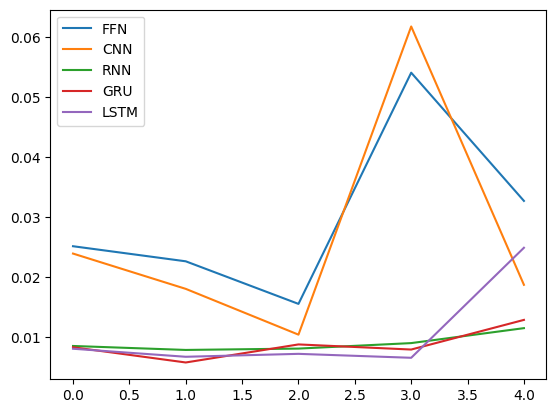

In [ ]:
for model_name in losses_per_model:
    plt.plot(losses_per_model[model_name])

plt.legend(list(losses_per_model.keys()))

# function to show the plot
plt.show()